<a href="https://colab.research.google.com/github/LuisaUpegui/mushrooms-classification-/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Data information**

***Source***

This data was obtained from: *Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981)*. G. H. Lincoff (Pres.), New York: Alfred A. Knopf

*Donor:*
Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)


**Attribute Information:**

This data set includes some morphological and physiological  characteristics corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family from agaricales order uselful to classify them as a definitely edible, definitely poisonous (class in the data set this one is also our target).



1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

4. bruises?: bruises=t,no=f

5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

6. gill-attachment: attached=a,descending=d,free=f,notched=n

7. gill-spacing: close=c,crowded=w,distant=d

8. gill-size: broad=b,narrow=n

9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,
pink=p,purple=u,red=e, white=w,yellow=y

10. stalk-shape: enlarging=e,tapering=t

11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

16. veil-type: partial=p,universal=u

17. veil-color: brown=n,orange=o,white=w,yellow=y

18. ring-number: none=n,one=o,two=t

19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# What is the object of this project

the main object of this project its to create a model that can classify if a mushroom is edible or poisonous based on some morphological, biological and physiological characteristics 


# Imports


In [ ]:
from google.colab import drive #Dar acceso al drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import classification_report

# Data exploration

In [ ]:
import pandas as pd 
filename="/content/drive/MyDrive/Colab Notebooks/Coding dojo/project 2/mushrooms.csv"

In [ ]:
df=pd.read_csv(filename)

In [ ]:
df.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [ ]:
#the data set has 8124 instances or entries and the number of attribures are 22 all nominaly valued  
#Our target is Class (binary) (e or p)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#Apparently there is not null values 
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#After doing a close inspection we found: 
#2480 values of the stalk-root attribute are (denoted by "?")
# so the best way to deal with them is to delete the column 
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [ ]:
#Drop stalk-root variable
df=df.drop(columns=['stalk-root'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

# Graphic exploration

In [ ]:
Class = df["class"].value_counts()


In [ ]:
#In this plot we can see the count of the two classes Edible/Poisonous
#we can see that the edible class a little more values than the poisson's class 
#so our data set is not balanced

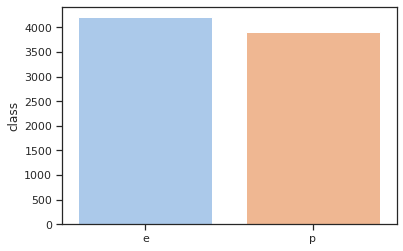

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
Class = df["class"].value_counts()
sns.barplot(x =Class.index, y = Class)

In [ ]:
#This plot shows the distribution of the cap shape, here we can see there is 6 different types of shapes
# but two of them are the ones who present more values in the data set this are: X and F that correspond to 
# convex=x and flat=f

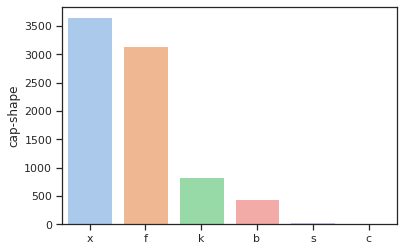

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
cap = df["cap-shape"].value_counts()
sns.barplot(x =cap.index, y = cap)


In [ ]:
#This plot shows the distribution of the mushrooms habitat, here we can see 7 different types of habitat
# but two of them are the ones who present more values in the data set this are: d and g that correspond to 
# d=woods and g=grasses


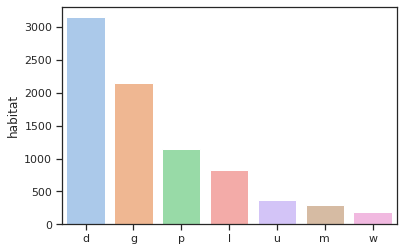

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

habitat = df["habitat"].value_counts()
sns.barplot(x =habitat.index, y = habitat)

In [ ]:
#Other important characteristics to define a mushrooms is edible or poisonous is the spore print color 
#in this plot we can see that the color who present more number of individuals are w=white with at least 2400 individuals


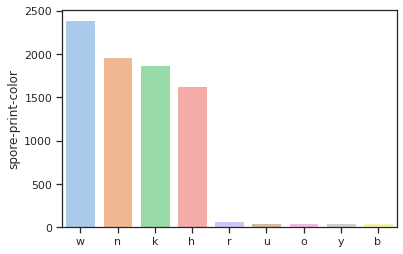

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

sporecolor = df["spore-print-color"].value_counts()
sns.barplot(x =sporecolor.index, y = sporecolor)


# Preprocessing

In [ ]:
#drop class column 
X = df.drop(columns=['class'])
#Define our target column 
y = df['class']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [ ]:
#Inicializar transformadores

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [ ]:
#Inicializar pipelines 

nom_cat_pipe = make_pipeline(ohe)

In [ ]:
nom_tuple = (nom_cat_pipe, ["cap-shape","cap-surface", "cap-color",'bruises','odor','gill-attachment','gill-spacing',
                   'gill-spacing','gill-size',   'gill-color','stalk-shape'  ,'stalk-surface-above-ring',
                   'stalk-surface-below-ring', 'stalk-color-above-ring'  , 'stalk-color-below-ring', 
                   'veil-type',  'veil-color', 'ring-number',   'ring-type',  'spore-print-color', 'population',  'habitat'   ])

In [ ]:
#Inicializar las columnas transformer
preprocessor = make_column_transformer( nom_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['cap-shape', 'cap-surface', 'cap-color',
                                  'bruises', 'odor', 'gill-attachment',
                                  'gill-spacing', 'gill-spacing', 'gill-size',
                                  'gill-color', 'stalk-shape',
                                  'stalk-surface-above-ring',
                                  'stalk-surface-below-ring',
                                  'stalk-color-above-ring',
                                  'stalk-color-below-ring', 'veil-type',
                                  'veil-color', 'ring-number', 'ring-type',
                                  'spore-print-color', 'population',
                                  'habitat'])])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['cap-shape', 'cap-surface', 'cap-color',
                                  'bruises', 'odor', 'gill-attachment',
                                  'gill-spacing', 'gill-spacing', 'gill-size',
                                  'gill-color', 'stalk-shape',
                                  'stalk-surface-above-ring',
                                  'stalk-surface-below-ring',
                                  'stalk-color-above-ring',
                                  'stalk-color-below-ring', 'veil-type',
                                  'veil-color', 'ring-number', 'ring-type',
                                  'spore-print-color', 'population',
                                  'habitat'])])

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Decision Tree 

In [ ]:
# 
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=5, criterion = 'gini',)

In [ ]:
# fit the model 
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.9995896594173164
1.0


In [ ]:
dec_tree.predict(X_test_processed)

array(['e', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'p', 'p', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e',
       'e', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'e',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e',
       'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'e', 'e

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
predicciones = dec_tree.predict(X = X_test_processed,)
cnf_matrix = metrics.confusion_matrix(y_test, predicciones)
cnf_matrix

array([[433,   0],
       [  0, 380]])

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       433
           p       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Text(0.5, 257.44, 'Predicted label')

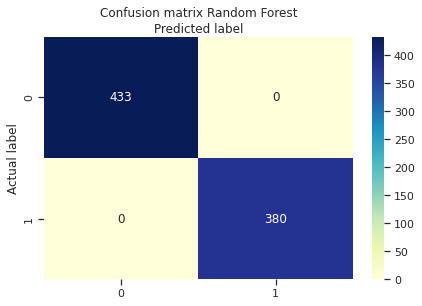

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#The confusion matrix in this first model show us that the model can classify if a 
#mushrooms is edible or poisonous with a precision of 100%

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=76, n_estimators=400,
                       n_jobs=4)

In [ ]:
train_preds = rf.predict(X_train_processed)
test_preds = rf.predict(X_test_processed)

In [ ]:
train_score = rf.score(X_train_processed, y_train)
test_score = rf.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.9887840240733142
0.992619926199262


In [ ]:

rf_5 = RandomForestClassifier(max_depth =8, random_state = 42)
rf_5.fit(X_train_processed, y_train)
train_5_score = rf_5.score(X_train_processed, y_train)
test_5_score = rf_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

1.0
1.0


In [ ]:
predicciones2 = rf_5.predict(X = X_test_processed,)
cnf_matrix = metrics.confusion_matrix(y_test, predicciones2)
cnf_matrix

array([[433,   0],
       [  0, 380]])

In [ ]:
#The confusion matrix in this first model show us that the model can classify if a 
#mushrooms is edible or poisonous with a precision of 100%

In [ ]:
print(classification_report(y_test, predicciones2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       433
           p       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [ ]:
#The classification report obtained shows a value of 1 for recall, precision and F1 
#suggesting that the model works so well to classify mushrooms as edible or poisonous.